Number of updates: 
348


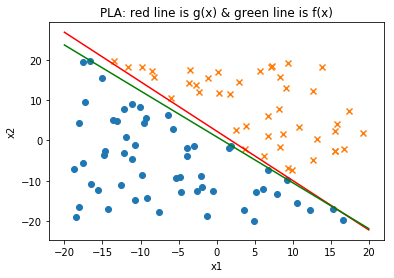

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt

#FOR 2-DIMENSIONAL INPUT

def generateData(ds):
    a = random.uniform(-20,20);
    b = random.uniform(-20,20);
    c = random.uniform(-20,20);
    X = []
    Y = []
    Z = []
    Z.append(a)
    Z.append(b)
    Z.append(c)
    while(ds>=1):
        x1 = random.uniform(-20,20);
        x2 = random.uniform(-20,20);
        Xrow = []
        Xrow.append(x1)
        Xrow.append(x2)
        if((a*x1 + b*x2 + c) >= 0):
            Y.append(1)
        else:
            Y.append(-1)
        ds = ds-1
        X.append(Xrow)
    return X,Y,Z

def perceptron(X,Y,ds):
    W = [0,0,0]
    ds1 = ds
    i=0
    count = 0
    while(ds1>=1):
        if((W[0]+W[1]*X[i][0]+W[2]*X[i][1])>=0 and Y[i] == -1):
            W[0] = W[0]-1
            W[1] = W[1]-X[i][0]
            W[2] = W[2]-X[i][1]
            ds1 = ds
            i=0
            count = count +1
        elif((W[0]+W[1]*X[i][0]+W[2]*X[i][1])<0 and Y[i] == 1):
            W[0] = W[0]+1
            W[1] = W[1]+X[i][0]
            W[2] = W[2]+X[i][1]
            ds1 = ds
            i=0
            count = count +1
        else:
            ds1=ds1-1
            i = i+1
    print("Number of updates: ")
    print(count)
    return W

dataset = 100
X,Y,Z = generateData(dataset)
W = perceptron(X,Y,dataset)
X_pos_0 = []
X_pos_1 = []
X_neg_0 = []
X_neg_1 = []
Xrow = []

for i in range(0,len(X)):
    if(Y[i] == 1):
        X_pos_0.append(X[i][0])
        X_pos_1.append(X[i][1])
    else:
        X_neg_0.append(X[i][0])
        X_neg_1.append(X[i][1])
plt.scatter(X_pos_0, X_pos_1, marker = 'o')
plt.scatter(X_neg_0, X_neg_1, marker = 'x')

gx = np.linspace(-20,20)
if(W[2] != 0):
    plt.plot(gx,-1*(((W[1]/W[2])*gx)+ (W[0]/W[2])),'-r',label='g(x)')
else:
    plt.plot(gx,(-W[0]/W[1]),'-r',label='g(x)')

fx = np.linspace(-20,20)
if(Z[1] != 0):
    plt.plot(fx,-1*(((Z[0]/Z[1])*fx)+ (Z[2]/Z[1])),'-g',label='f(x)')
else:
    plt.plot(fx,(-Z[2]/Z[1]),'-g',label='f(x)')


plt.xlabel('x1')
plt.ylabel('x2')
plt.title('PLA: red line is g(x) & green line is f(x)')
plt.show()